In [1]:
# importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
# THIS IS THE BEGINNING OF PREPROCESSING(DATA CLEANING)
---

In [2]:
# reading the data 
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [3]:
df.shape

(10841, 14)

there is an extra unnamed column in the dataset, has been removed

In [4]:
# delete unnamed which is extra column in the dataset
df.drop('Unnamed: 13', axis=1, inplace=True)

### now some numeric columns having object type, must be converted to purely numeric type

In [5]:
df.shape

(10841, 13)

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# print in f string the shape of the dataset
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (10841, 13)


In [8]:
# print the columns of the dataset in f string
print(f"The columns of the dataset are {df.columns.tolist()}")

The columns of the dataset are ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [9]:
# printing rows in f string
print(f"The number of rows in the dataset is {df.shape[0]}")
print(f"The number of columns in the dataset is {df.shape[1]}")

The number of rows in the dataset is 10841
The number of columns in the dataset is 13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [11]:
# printing only numeric columns
print(f"The numeric columns in the dataset are: {df.select_dtypes(include=[np.number]).columns.tolist()}")

The numeric columns in the dataset are: ['Rating', 'Reviews']


In [12]:
# printing non numeric columns 
print(f"The non-numeric columns in the dataset are: {df.select_dtypes(exclude=[np.number]).columns.tolist()}")

The non-numeric columns in the dataset are: ['App', 'Category', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [13]:
# numeric columns can be fined by describing the dataset
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


#### Here we have only 2 numeric colums in the dataset which is not true

---
#### *Numric colums with object tye*
1. Size
2. Installs
3. Price
---

In [14]:
# printing values counts of size column
print(f"The unique values in the 'Size' column are: {df['Size'].unique()}") 

The unique values in the 'Size' column are: ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1

---
### Observations
1. varies with device
2. M
3. small "k"
---

### now checking missing values in size column, if not then we will good to go

In [15]:
# missing values in size column
print(f"The number of missing values in the 'Size' column is: {df['Size'].isnull().sum()}")

The number of missing values in the 'Size' column is: 0


### So no missing values, we are good to go

#### verifying 3 different kinds of values in size column, varies with device, M, and small k 

In [16]:
# print only size column having values with kind "M"
print(f"The values in the 'Size' column that contain 'M' are: {df['Size'][df['Size'].str.contains('M', na=False)].unique()}")

The values in the 'Size' column that contain 'M' are: ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' '9.4M' '15M' '10M' '1.2M'
 '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '3.6M' '5.7M' '8.6M' '2.4M'
 '27M' '2.5M' '16M' '3.4M' '8.9M' '3.9M' '2.9M' '38M' '32M' '5.4M' '18M'
 '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M' '6.7M' '30M' '2.6M' '7.1M'
 '3.7M' '22M' '7.4M' '6.4M' '3.2M' '8.2M' '9.9M' '4.9M' '9.5M' '5.0M'
 '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M'
 '9.1M' '55M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M'
 '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '8.4M'
 '44M' '1.6M' '6.2M' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '76M' '7.6M' '59M' '9.7M' '78M'
 

In [17]:
# print value counts of only size column having values with kind "M" 
print(f"The values in the 'Size' column that contain 'M' are: {df['Size'][df['Size'].str.contains('M', na=False)].value_counts()}")

The values in the 'Size' column that contain 'M' are: Size
11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
84M       9
89M       9
86M       8
1.0M      7
90M       6
Name: count, Length: 182, dtype: int64


In [18]:
# print only size column having values with kind "M" using loc function
print(f"The values in the 'Size' column that contain 'M' are: {df.loc[df['Size'].str.contains('M', na=False), 'Size'].value_counts()}")

The values in the 'Size' column that contain 'M' are: Size
11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
84M       9
89M       9
86M       8
1.0M      7
90M       6
Name: count, Length: 182, dtype: int64


In [19]:
# print only size column having values with kind "M" using loc function sum method and value_counts method
print(f"The values in the 'Size' column that contain 'M' are: {df.loc[df['Size'].str.contains('M', na=False), 'Size'].value_counts().sum()}")

The values in the 'Size' column that contain 'M' are: 8830


In [20]:
# print only size column having values with kind "K" using loc function and sum method and value_counts method
print(f"The values in the 'Size' column that contain 'k' are: {df.loc[df['Size'].str.contains('k', na=False), 'Size'].value_counts().sum()}")

The values in the 'Size' column that contain 'k' are: 316


In [21]:
# print only size column having values with kind "varies with device" using loc function and sum method and value_counts method 
print(f"The values in the 'Size' column that contain 'Varies with device' are: {df.loc[df['Size'].str.contains('Varies with device', na=False), 'Size'].value_counts().sum()}")

The values in the 'Size' column that contain 'Varies with device' are: 1695


---
### Hence proved there are total 8830+316+1695 = 10841 values in size column that are having values with kind "M", "K", and "varies with device" respectively
---

In [22]:
8830+316+1695

10841

In [23]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [24]:
# convert size column to numeric values but size should be in MB
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip()) # strip removes any leading or trailing whitespace
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert KB to MB
    elif size == 'Varies with device':
        return np.nan  # Handle 'Varies with device' as NaN
    else:
        return np.nan  # Handle any other unexpected formats as NaN
df['Size'] = df['Size'].apply(convert_size)

In [25]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

In [26]:
# now rename the size column to size_MB
df.rename(columns={'Size': 'Size_MB'}, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
# also convert MB to KB and create a new column Size_KB
df['Size_KB'] = df['Size_MB'] * 1024
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2


---
### *This is the same way of doing it in one line with lambda function*
---

In [28]:
# df['Size_KB'] = df['Size_MB'] * 1024 do it in one line with lambda function
df['Size_KB'] = df['Size_MB'].apply(lambda x: x * 1024 if pd.notnull(x) else np.nan)
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2


In [29]:
# now how many numeric columns are there in the dataset
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"The numeric columns in the dataset are: {numeric_columns}")

The numeric columns in the dataset are: ['Rating', 'Reviews', 'Size_MB', 'Size_KB']


In [30]:
# find unique values in the 'installs' column
unique_installs = df['Installs'].unique()
print(f"The unique values in the 'Installs' column are: {unique_installs}")

The unique values in the 'Installs' column are: ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [31]:
# find value counts of the 'Installs' column
installs_counts = df['Installs'].value_counts()
print(f"The value counts of the 'Installs' column are:\n{installs_counts}")

The value counts of the 'Installs' column are:
Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64


In [32]:
# find missing values in the 'Installs' column
missing_installs = df['Installs'].isnull().sum()
print(f"The number of missing values in the 'Installs' column is: {missing_installs}")

The number of missing values in the 'Installs' column is: 0


#### There is no missing values in the 'Installs' column and observations are:
1. Remove the plus '+' sign from the 'Installs' column
2. Remove the comma ',' from the 'Installs' column
3. Convert the 'Installs' column to integer values

In [33]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [34]:
# remove the '+' sign from the 'Installs' column using lambda function
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if isinstance(x, str) else x)
df["Installs"]

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [35]:
# remove the "," sign from the 'Installs' column using lambda function
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [36]:
# convert the 'Installs' column to interger type using lambda function
df['Installs'] = df['Installs'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int64

In [37]:
# print datatype of the 'Installs' column
print(f"The datatype of the 'Installs' column is: {df['Installs'].dtype}")

The datatype of the 'Installs' column is: int64


In [38]:
# print the numeric columns in the dataset
print(f"The numeric columns in the dataset after cleaning are: {df.select_dtypes(include=[np.number]).columns.tolist()}")


The numeric columns in the dataset after cleaning are: ['Rating', 'Reviews', 'Size_MB', 'Installs', 'Size_KB']


In [39]:
# print the number of numeric columns in the dataset
print(f"The number of numeric columns in the dataset is: {len(numeric_columns)}")

The number of numeric columns in the dataset is: 4


---
### we will generate a new column based on installations, which will be helpfull in our analysis
---

In [40]:
# find maximum value in the 'Installs' column
max_installs = df['Installs'].max()
print(f"The maximum value in the 'Installs' column is: {max_installs}")

The maximum value in the 'Installs' column is: 1000000000


In [41]:
# creat binning for the 'Installs' column
bins = [-1, 0, 10, 1000,  10000, 100000,  1000000, 10000000, 1000000000, np.inf]
labels = ['no','very low', 'low', 'medium', 'high', 'very high', 'extremely high', 'super high', 'mega high']
# create lables in numeric format as well as in string format
df['Installs_Binned'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)
# print the value counts of the 'Installs_Binned' column
installs_binned_counts = df['Installs_Binned'].value_counts()
print(f"The value counts of the 'Installs_Binned' column are:\n{installs_binned_counts}")

The value counts of the 'Installs_Binned' column are:
Installs_Binned
extremely high    2331
super high        2022
very high         1708
low               1640
high              1533
medium            1385
very low           164
mega high           58
no                   0
Name: count, dtype: int64


---
# Now we are tackling the 'Price' column
--- 

In [42]:
# find missing values in the 'price' column
missing_price = df['Price'].isnull().sum()
print(f"The number of missing values in the 'Price' column is: {missing_price}")

The number of missing values in the 'Price' column is: 0


In [43]:
# find unique values in the 'price' column
unique_prices = df['Price'].unique()
print(f"The unique values in the 'Price' column are: {unique_prices}")

The unique values in the 'Price' column are: ['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [44]:
# find value counts of the 'Price' column
price_counts = df['Price'].value_counts()
print(f"The value counts of the 'Price' column are: {price_counts}")

The value counts of the 'Price' column are: Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64


# Observations:
1. remove the '$' sign from the 'Price' column

In [45]:
# find only those prices value having "$" sign using loc function but not having zero value
df.loc[(df['Price'].str.contains('$', na=False)) & (df['Price'] != '0'), 'Price'].value_counts().sum()


np.int64(800)

In [46]:
# removing the "$" sign from the 'Price' column using lambda function
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if isinstance(x, str) else x)
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
3.61          1
394.99        1
1.26          1
1.20          1
1.04          1
Name: count, Length: 92, dtype: int64

In [47]:
# converting the 'Price' column to float type using lambda function
df['Price'] = df['Price'].apply(lambda x: float(x) if pd.notnull(x) else np.nan)
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
3.61          1
394.99        1
1.26          1
1.20          1
1.04          1
Name: count, Length: 92, dtype: int64

In [48]:
# find min, max and mean of the 'Price' column and print them in dollar sign
min_price = df['Price'].min()
max_price = df['Price'].max()    
mean_price = df['Price'].mean()
print(f"The minimum value in the 'Price' column is: ${min_price}")
print(f"The maximum value in the 'Price' column is: ${max_price}")
print(f"The mean value in the 'Price' column is: ${mean_price}")


The minimum value in the 'Price' column is: $0.0
The maximum value in the 'Price' column is: $400.0
The mean value in the 'Price' column is: $1.0272733142699015


In [49]:
# find the numeric columns in the dataset after cleaning
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"The numeric columns in the dataset after cleaning are: {numeric_columns}")

The numeric columns in the dataset after cleaning are: ['Rating', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Size_KB']


In [50]:
# find missing values in the dataset in descending order
df.isnull().sum().sort_values(ascending=False)

Size_MB            1695
Size_KB            1695
Rating             1474
Current Ver           8
Android Ver           2
Type                  1
Category              1
Genres                1
Installs              0
App                   0
Reviews               0
Last Updated          0
Content Rating        0
Price                 0
Installs_Binned       0
dtype: int64

In [51]:
# find missing values in percentage in the dataset in descending order and round to 2 decimal places
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False).round(2)


Size_MB            15.64
Size_KB            15.64
Rating             13.60
Current Ver         0.07
Android Ver         0.02
Type                0.01
Category            0.01
Genres              0.01
Installs            0.00
App                 0.00
Reviews             0.00
Last Updated        0.00
Content Rating      0.00
Price               0.00
Installs_Binned     0.00
dtype: float64

In [52]:
# print total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"The total number of missing values in the dataset is: {total_missing}")

The total number of missing values in the dataset is: 4877


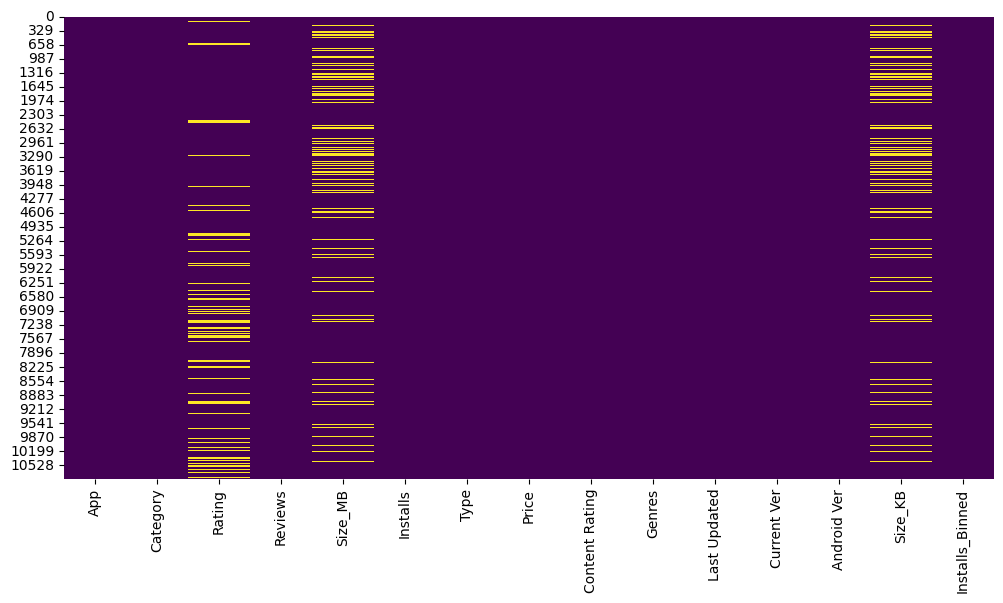

In [53]:
# plotting the missing values in the dataset using heatmap and display it
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


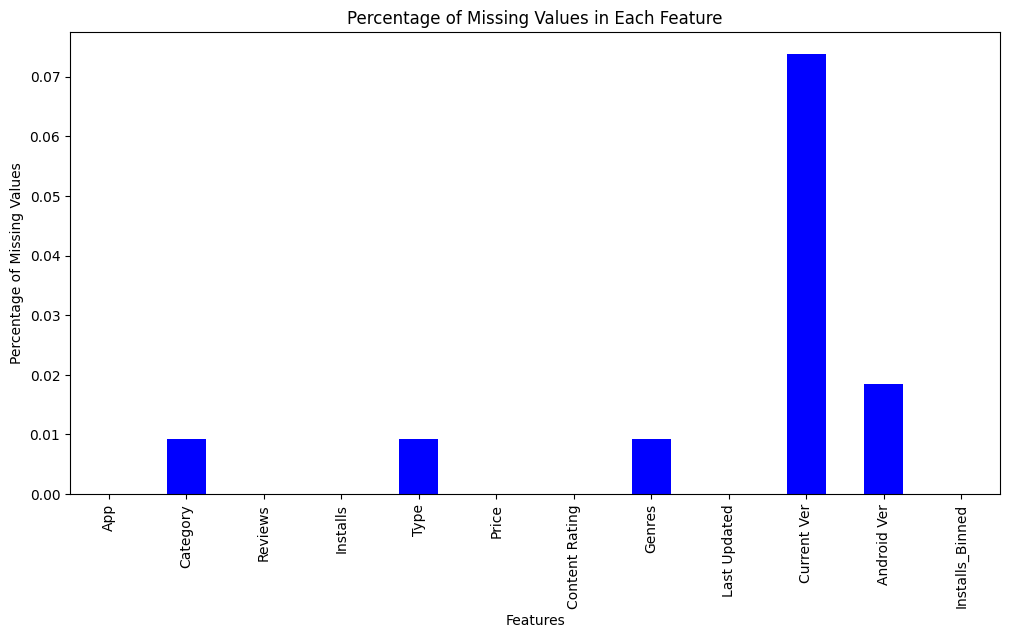

In [54]:
# plot those missing values having less than 1 percent of missing values
missing_percentage[missing_percentage < 1].plot(kind='bar', figsize=(12, 6), color='blue')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Feature')
plt.show()

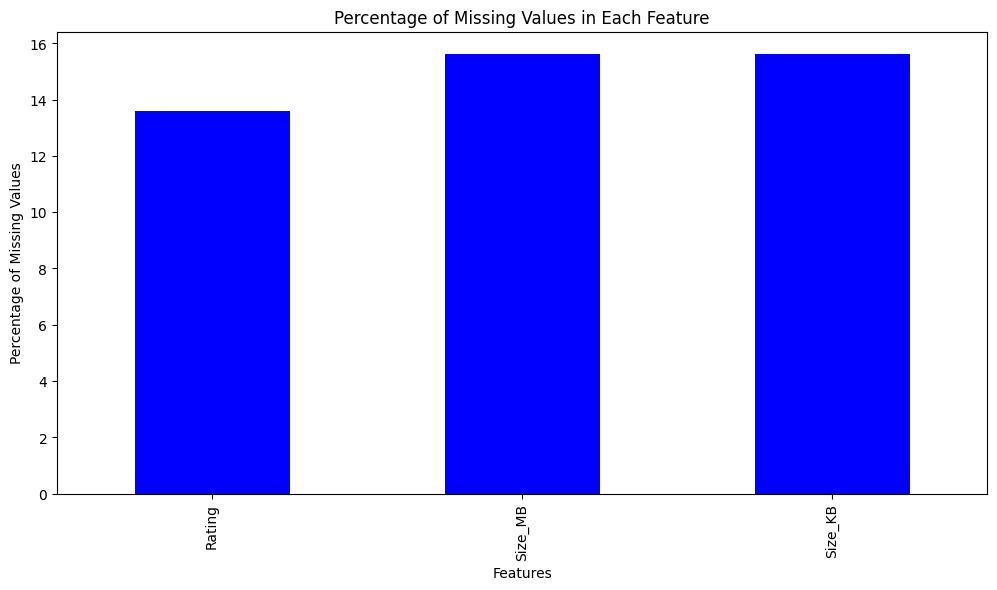

In [55]:
# plot missing values having more than 1 percent of missing values
missing_percentage[missing_percentage > 1].plot(kind='bar', figsize=(12, 6), color='blue')
plt.xlabel('Features')  
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Feature')
plt.show()

In [56]:
# find missing values in the dataset in descending order
df.isnull().sum().sort_values(ascending=False)

Size_MB            1695
Size_KB            1695
Rating             1474
Current Ver           8
Android Ver           2
Type                  1
Category              1
Genres                1
Installs              0
App                   0
Reviews               0
Last Updated          0
Content Rating        0
Price                 0
Installs_Binned       0
dtype: int64

# Now dealing with missing values in the dataset
1. In rating column there are 1474 missing values, but here these can not be replaced by mean or median because because if some apps having no installations then how we can replace them with 4.5 or some greater rating.
2. *for this, we first of all find correlation to verify the relationship between rating and installs.*


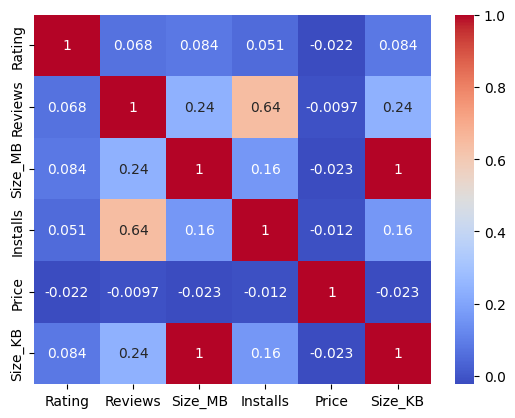

In [57]:
# find correlation between numeric columns in the dataset
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
# plot the correlation matrix using heatmap and display it
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# because of above reason, we will not impute and drop the missing values, because values are more in number i.e 1474.
# and some how there is relationship between rating and installs.

conda install pandas numpy matplotlib seaborn plotly scipy openpyxl scikit-learn

In [108]:
# import scipy
from scipy import stats
# find pearson correlation between 'reviews' and 'Installs'
pearson_corr, p_value = stats.pearsonr(df['Reviews'], df['Installs'])
print(f"Pearson correlation between 'Reviews' and 'Installs': {pearson_corr}, p-value: {p_value}")

Pearson correlation between 'Reviews' and 'Installs': 0.6349873925577967, p-value: 0.0


# we can find pearson correlation between 'reviews' and 'Installs' is 0.643, so we can say that there is a strong positive correlation between 'reviews' and 'Installs'.

---
 *before we move forward, remove the missing value in the colums having less than 1 percent of missing values.*
---

In [59]:
# find missing values in dataset in descending order wihth percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False).round(2)

Size_MB            15.64
Size_KB            15.64
Rating             13.60
Current Ver         0.07
Android Ver         0.02
Type                0.01
Category            0.01
Genres              0.01
Installs            0.00
App                 0.00
Reviews             0.00
Last Updated        0.00
Content Rating      0.00
Price               0.00
Installs_Binned     0.00
dtype: float64

In [60]:
# search those columns having missing values less than 1 percent
missing_columns = missing_percentage[missing_percentage < 1].index.tolist()
print(f"The columns having missing values less than 1 percent are: {missing_columns}")

The columns having missing values less than 1 percent are: ['App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Installs_Binned']


In [61]:
# print total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"The total number of missing values in the dataset is: {total_missing}")

The total number of missing values in the dataset is: 4877


In [62]:
# drop all Nan values from those columns having missing values less than 1 percent
df.dropna(subset=missing_columns, inplace=True)
# print the shape of the dataset after dropping missing values
print(f"The shape of the dataset after dropping missing values is: {df.shape}")

The shape of the dataset after dropping missing values is: (10829, 15)


---
## here we removed missing values in the columns having less than 1 percent of missing values.
---

In [63]:
# total number of missing values in dataset 
total_missing = df.isnull().sum().sum()
print(f"The total number of missing values in the dataset is: {total_missing}")

The total number of missing values in the dataset is: 4857


#### *as we know that for "rating" column we have 1474 missing values, but we can not replace them with mean or median because if some apps having no installations then how we can replace them with 4.5 or some greater rating.*
#### at the same time we know about "size" column, because we cant say that the app having this much size for its missing value because it depends on the device and development process.

In [64]:
# use groupby to find different ratings for each install category
install_ratings = df.groupby('Installs_Binned', observed=False)['Rating'].describe()
# print the install ratings
print(f"The average ratings for each install category are:\n{install_ratings}")

The average ratings for each install category are:
                  count      mean       std  min  25%  50%  75%  max
Installs_Binned                                                     
no                  0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
very low           12.0  4.708333  1.010363  1.5  5.0  5.0  5.0  5.0
low               635.0  4.337638  0.858701  1.0  4.0  4.6  5.0  5.0
medium           1143.0  4.051269  0.732098  1.0  3.7  4.2  4.6  5.0
high             1475.0  4.043051  0.578385  1.6  3.8  4.2  4.5  5.0
very high        1687.0  4.128690  0.473729  1.6  3.9  4.2  4.5  4.9
extremely high   2328.0  4.228136  0.339067  2.0  4.1  4.3  4.5  4.9
super high       2022.0  4.339960  0.249741  3.0  4.2  4.4  4.5  4.9
mega high          58.0  4.258621  0.212780  3.7  4.1  4.3  4.4  4.5


In [65]:
# In which install category the ratings are NaN?
nan_ratings = df[df['Rating'].isnull()]['Installs_Binned'].value_counts()
print(f"The install categories with NaN ratings are:\n{nan_ratings}")

The install categories with NaN ratings are:
Installs_Binned
low               1003
medium             238
very low           151
high                55
very high           20
extremely high       2
no                   0
super high           0
mega high            0
Name: count, dtype: int64


In [66]:
# dataframe shape
print(f"The shape of the dataframe is: {df.shape}")

The shape of the dataframe is: (10829, 15)


In [67]:
# replacing respective NaN ratings with the mean of the respective install category
def replace_nan_ratings(row):
    if pd.isnull(row['Rating']):
        return df[df['Installs_Binned'] == row['Installs_Binned']]['Rating'].mean()
    else:
        return row['Rating']
df['Rating'] = df.apply(replace_nan_ratings, axis=1)

In [68]:
# In which install category the ratings are NaN?
nan_ratings = df[df['Rating'].isnull()]['Installs_Binned'].value_counts()
print(f"The install categories with NaN ratings are:\n{nan_ratings}")

The install categories with NaN ratings are:
Installs_Binned
no                0
very low          0
low               0
medium            0
high              0
very high         0
extremely high    0
super high        0
mega high         0
Name: count, dtype: int64


In [69]:
# dataframe shape
print(f"The shape of the dataframe is: {df.shape}")

The shape of the dataframe is: (10829, 15)


In [70]:
# in which install category the reviews are NaN?
nan_reviews = df[df['Reviews'].isnull()]['Installs_Binned'].value_counts()
print(f"The install categories with NaN reviews are:\n{nan_reviews}")

The install categories with NaN reviews are:
Installs_Binned
no                0
very low          0
low               0
medium            0
high              0
very high         0
extremely high    0
super high        0
mega high         0
Name: count, dtype: int64


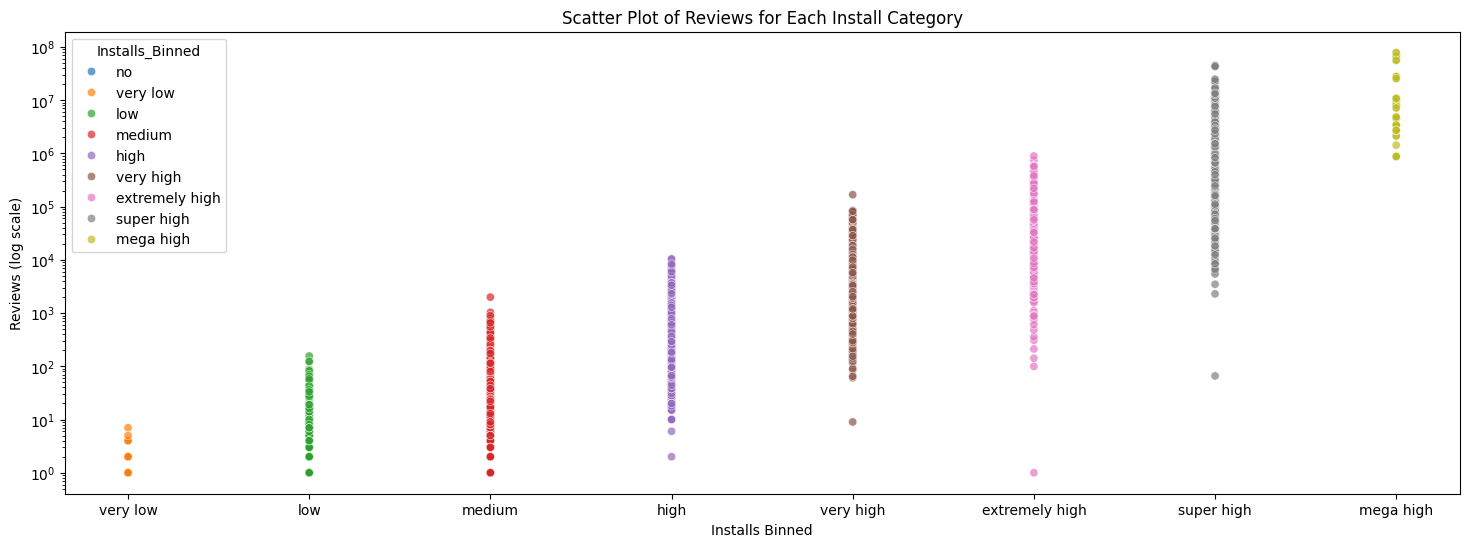

In [71]:
# scatter plot of the reviews for each install category using log scale
plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x='Installs_Binned', y='Reviews', hue='Installs_Binned', alpha=0.7)
plt.yscale('log')   
plt.xlabel('Installs Binned')
plt.ylabel('Reviews (log scale)')
plt.title('Scatter Plot of Reviews for Each Install Category')
plt.show()

# now dealing with duplicate values

In [72]:
# duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print(f"The number of duplicate rows in the dataset is: {duplicate_rows}")

The number of duplicate rows in the dataset is: 483


In [73]:
# duplicate rows in the dataset sorting by 'App' and 'Category'
duplicate_rows_sorted = df[df.duplicated(keep=False)].sort_values(by=['App', 'Category'])
print(f"The duplicate rows in the dataset sorted by 'App' and 'Category' are:\n{duplicate_rows_sorted}")

The duplicate rows in the dataset sorted by 'App' and 'Category' are:
                                                    App            Category  \
1393                              10 Best Foods for You  HEALTH_AND_FITNESS   
1407                              10 Best Foods for You  HEALTH_AND_FITNESS   
2322                         1800 Contacts - Lens Store             MEDICAL   
2543                         1800 Contacts - Lens Store             MEDICAL   
2256                         2017 EMRA Antibiotic Guide             MEDICAL   
...                                                 ...                 ...   
3063  theScore: Live Sports Scores, News, Stats & Vi...              SPORTS   
3085  theScore: Live Sports Scores, News, Stats & Vi...              SPORTS   
3103                           trivago: Hotels & Travel    TRAVEL_AND_LOCAL   
3118                           trivago: Hotels & Travel    TRAVEL_AND_LOCAL   
3202                           trivago: Hotels & Travel    TR

In [74]:
# drop duplicate rows in the dataset
df.drop_duplicates(inplace=True)
# print the shape of the dataset after dropping duplicate rows
print(f"The shape of the dataset after dropping duplicate rows is: {df.shape}")

The shape of the dataset after dropping duplicate rows is: (10346, 15)


---
# THIS IS THE END OF PREPROCESSING(DATA CLEANING)
---

---
# Commencement of INSIGHTS from the data
---

In [75]:
# find 15 insights from the dataset one by one
# Insight 1: The most common category of apps is ART_AND_DESIGN.
most_common_category = df['Category'].value_counts().idxmax()
print(f"The most common category of apps is: {most_common_category}")

The most common category of apps is: FAMILY


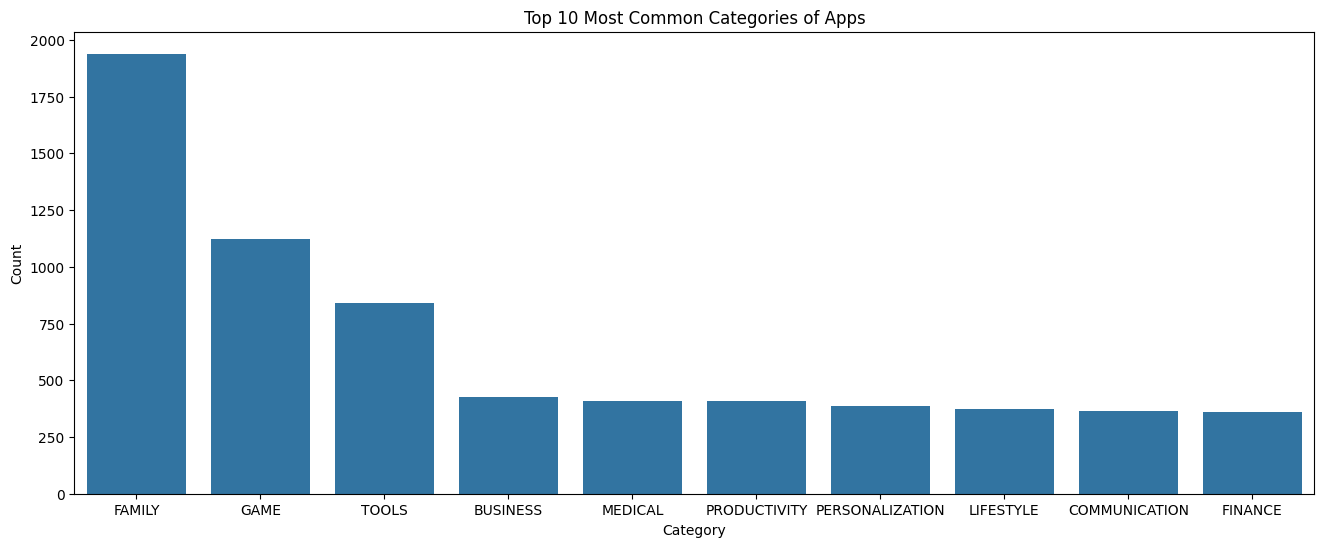

In [76]:
# plot insigt 1 but only for the top 7 categories
top_categories = df['Category'].value_counts().head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Most Common Categories of Apps')
plt.show()

In [77]:
# Insight 2: The average rating of apps in the dataset is 4.19.
average_rating = df['Rating'].mean()
print(f"The average rating of apps in the dataset is: {average_rating}")

The average rating of apps in the dataset is: 4.206023155919606


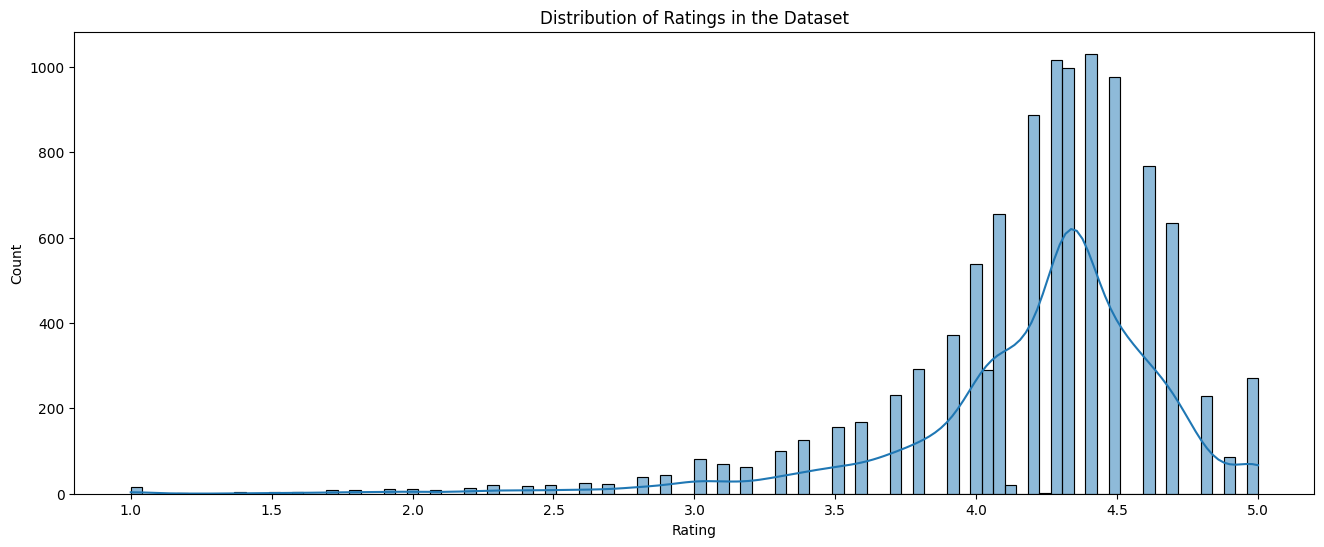

In [78]:
# plot insight 2
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Rating', kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in the Dataset')
plt.show()

In [79]:
# insight 3: The most expensive app in the dataset is $400.
most_expensive_app = df[df['Price'] == df['Price'].max()]['App'].values[0]
print(f"The most expensive app in the dataset is: {most_expensive_app}")

The most expensive app in the dataset is: I'm Rich - Trump Edition


In [80]:
# insight 4: The app with the highest number of reviews is "Facebook" with 78,000,000 reviews.
most_reviews_app = df[df['Reviews'] == df['Reviews'].max()]['App'].values[0]
print(f"The app with the highest number of reviews is: {most_reviews_app}")

The app with the highest number of reviews is: Facebook


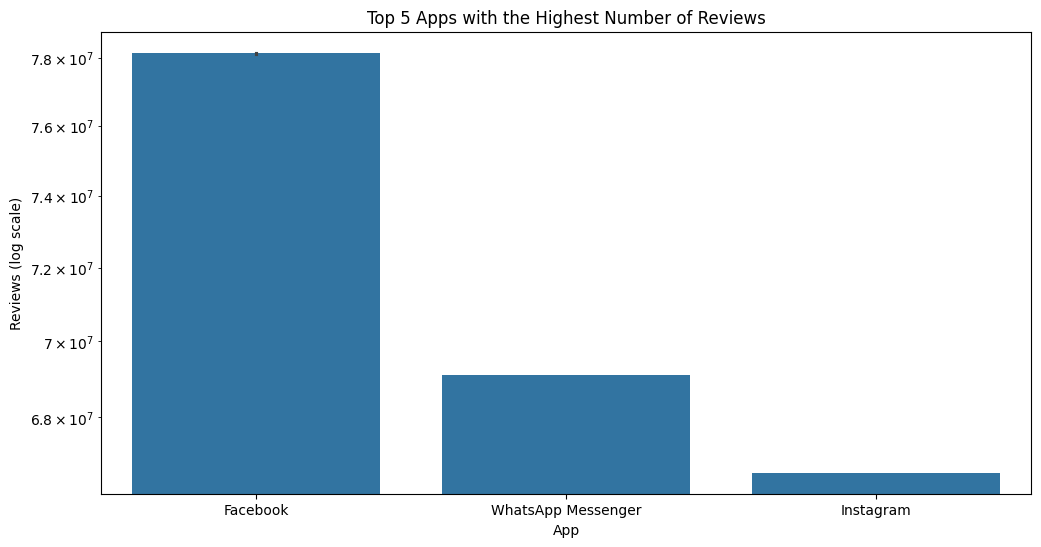

In [81]:
# plot insight 4 using log scale for top 5 apps with highest reviews
top_reviews_apps = df.nlargest(5, 'Reviews')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews_apps['App'], y=top_reviews_apps['Reviews'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Reviews (log scale)')
plt.title('Top 5 Apps with the Highest Number of Reviews')
plt.show()

In [82]:
# insight 5: The app with the highest number of installs
most_installs_app = df[df['Installs'] == df['Installs'].max()]['App'].values[0]
print(f"The app with the highest number of installs is: {most_installs_app}")

The app with the highest number of installs is: Google Play Books


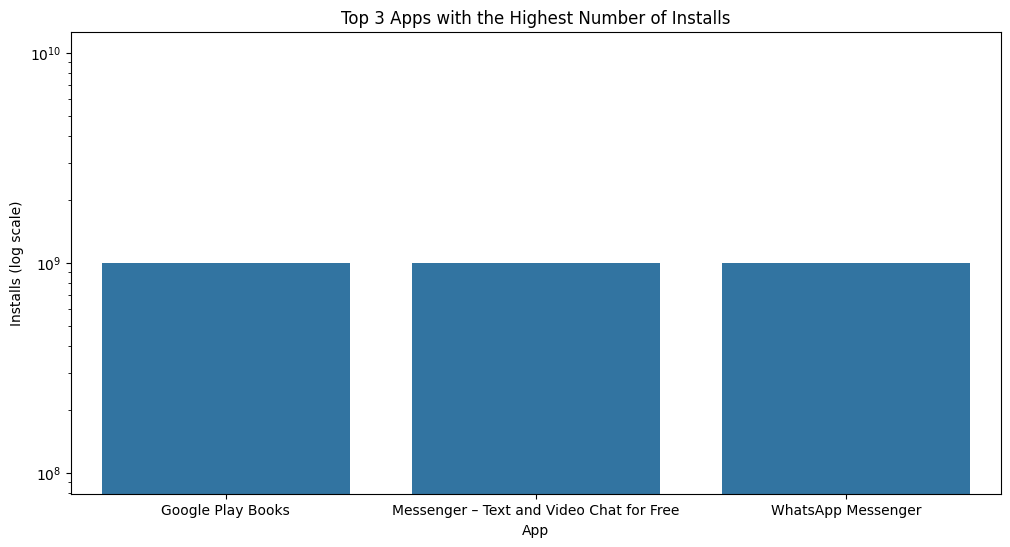

In [83]:
# plot insight 5 using log scale for top 3 apps with highest installs
top_installs_apps = df.nlargest(3, 'Installs')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_installs_apps['App'], y=top_installs_apps['Installs'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Installs (log scale)')
plt.title('Top 3 Apps with the Highest Number of Installs')
plt.show()

In [84]:
# insight 6: The app with the highest number of installs in the "FAMILY" category.
family_category = df[df['Category'] == 'FAMILY']
most_installs_family_app = family_category[family_category['Installs'] == family_category['Installs'].max()]['App'].values[0]
print(f"The app with the highest number of installs in the 'FAMILY' category is: {most_installs_family_app}")

The app with the highest number of installs in the 'FAMILY' category is: Google Play Games


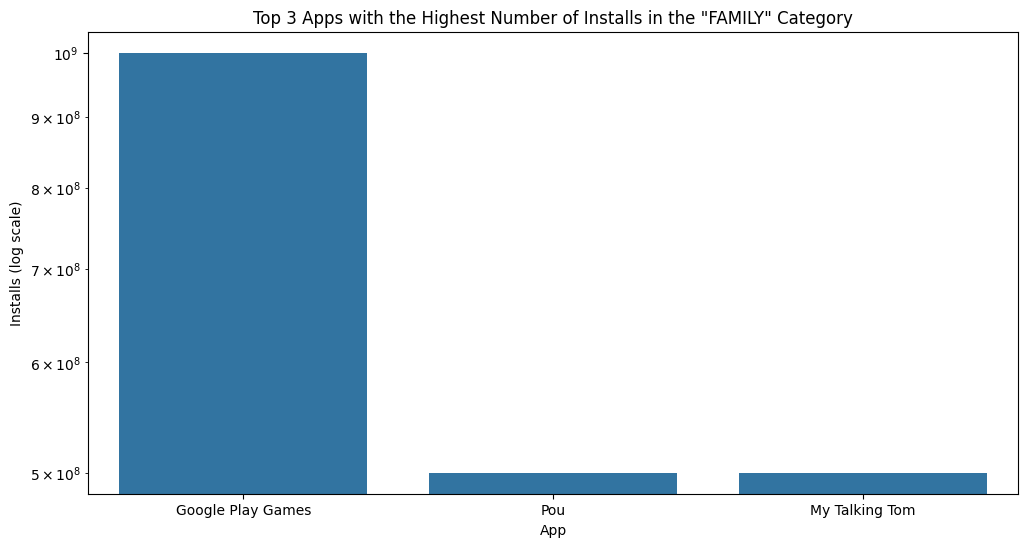

In [85]:
# insight 6: The app with the highest number of installs in the "FAMILY" category, only for the top 3 apps
top_family_apps = family_category.nlargest(3, 'Installs')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_family_apps['App'], y=top_family_apps['Installs'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Installs (log scale)')
plt.title('Top 3 Apps with the Highest Number of Installs in the "FAMILY" Category')
plt.show()

In [86]:
# insight 7: The app with the highest number of reviews in the "FAMILY" category.
most_reviews_family_app = family_category[family_category['Reviews'] == family_category['Reviews'].max()]['App'].values[0]
print(f"The app with the highest number of reviews in the 'FAMILY' category is: {most_reviews_family_app}")

The app with the highest number of reviews in the 'FAMILY' category is: Clash of Clans


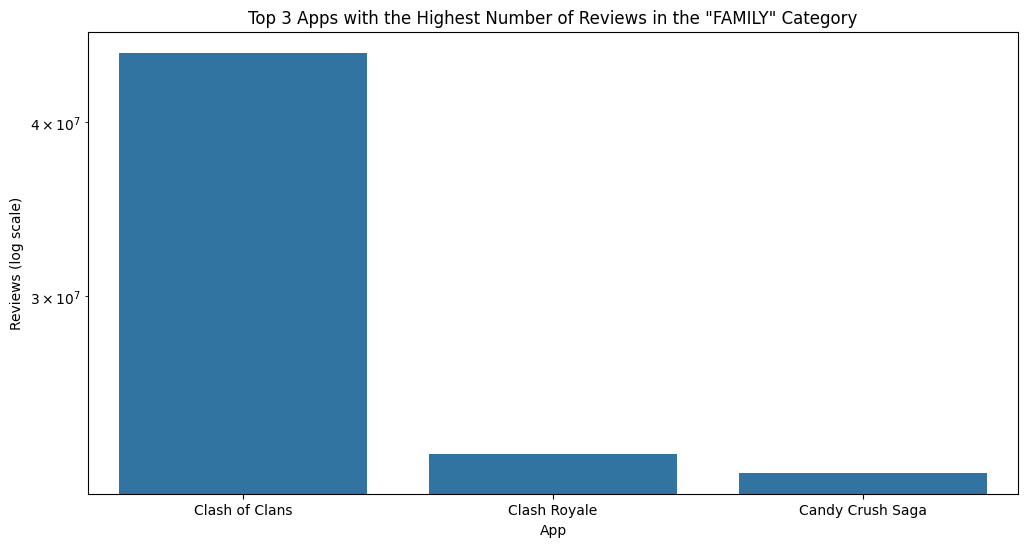

In [87]:
# plot insight 7 using log scale for top 3 apps with highest reviews in the "FAMILY" category
top_family_reviews_apps = family_category.nlargest(3, 'Reviews')    
plt.figure(figsize=(12, 6))
sns.barplot(x=top_family_reviews_apps['App'], y=top_family_reviews_apps['Reviews'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Reviews (log scale)')
plt.title('Top 3 Apps with the Highest Number of Reviews in the "FAMILY" Category')
plt.show()

In [88]:
# insight 8: The app with the highest number of reviews in the "GAME" category.
game_category = df[df['Category'] == 'GAME']
most_reviews_game_app = game_category[game_category['Reviews'] == game_category['Reviews'].max()]['App'].values[0]
print(f"The app with the highest number of reviews in the 'GAME' category is: {most_reviews_game_app}")

The app with the highest number of reviews in the 'GAME' category is: Clash of Clans


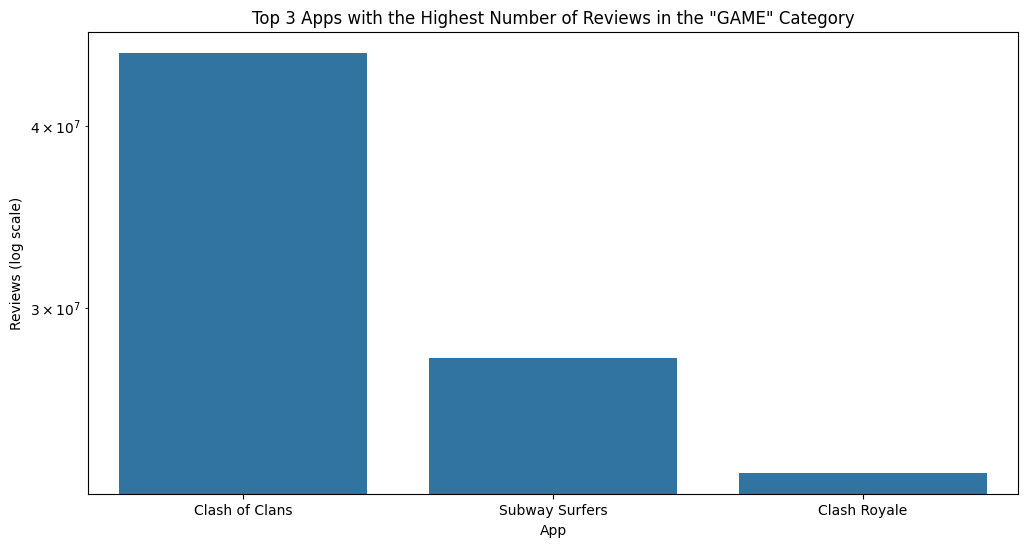

In [89]:
# plot insight 8 using log scale for top 3 apps with highest reviews in the "GAME" category
top_game_reviews_apps = game_category.nlargest(10, 'Reviews')    
plt.figure(figsize=(12, 6))
sns.barplot(x=top_game_reviews_apps['App'], y=top_game_reviews_apps['Reviews'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Reviews (log scale)')
plt.title('Top 3 Apps with the Highest Number of Reviews in the "GAME" Category')
plt.show()

In [90]:
# insight 9: The app with the highest number of installs in the "GAME" category.
most_installs_game_app = game_category[game_category['Installs'] == game_category['Installs'].max()]['App'].values[0]
print(f"The app with the highest number of installs in the 'GAME' category is: {most_installs_game_app}")

The app with the highest number of installs in the 'GAME' category is: Subway Surfers


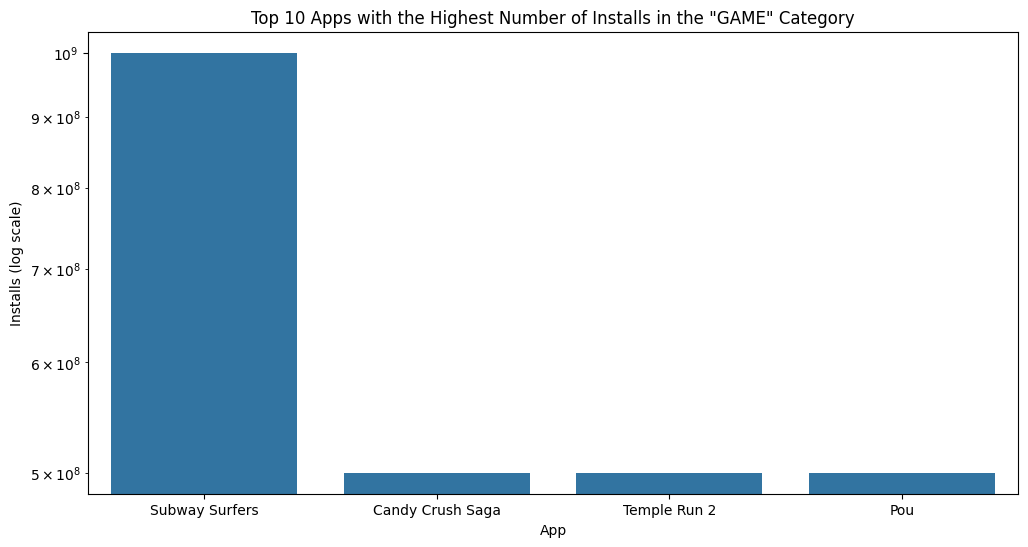

In [91]:
# plot insight 9 using log scale for top 10 apps with highest installs in the "GAME" category
top_game_installs_apps = game_category.nlargest(10, 'Installs')    
plt.figure(figsize=(12, 6))
sns.barplot(x=top_game_installs_apps['App'], y=top_game_installs_apps['Installs'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Installs (log scale)')
plt.title('Top 10 Apps with the Highest Number of Installs in the "GAME" Category')
plt.show()

In [92]:
# insight 10: The app with the highest number of installs in the "EDUCATION" category.
education_category = df[df['Category'] == 'EDUCATION']
most_installs_education_app = education_category[education_category['Installs'] == education_category['Installs'].max()]['App'].values[0]
print(f"The app with the highest number of installs in the 'EDUCATION' category is: {most_installs_education_app}")

The app with the highest number of installs in the 'EDUCATION' category is: Duolingo: Learn Languages Free


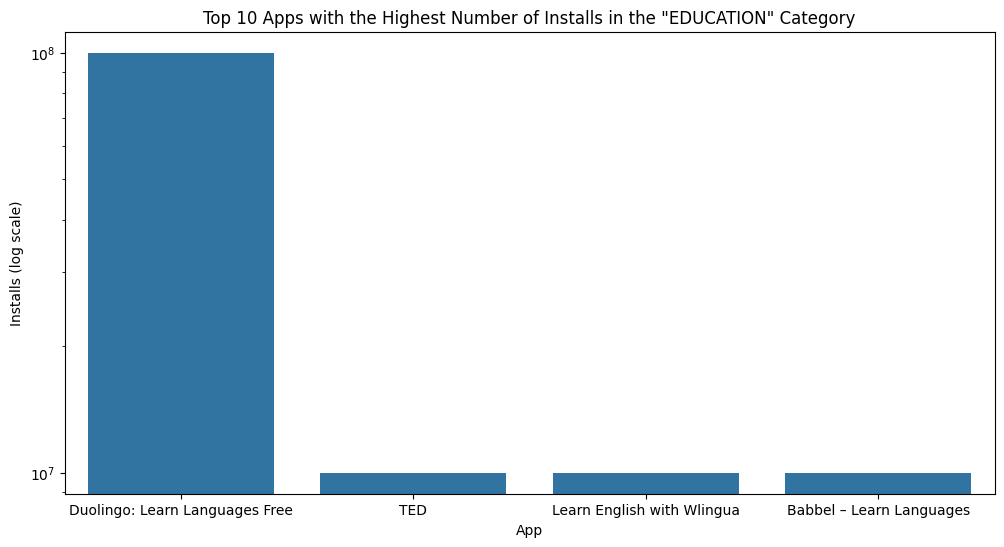

In [93]:
# plot insight 10 using log scale for top 10 apps with highest installs in the "EDUCATION" category
top_education_installs_apps = education_category.nlargest(5, 'Installs')    
plt.figure(figsize=(12, 6))
sns.barplot(x=top_education_installs_apps['App'], y=top_education_installs_apps['Installs'])
plt.yscale('log')
plt.xlabel('App')
plt.ylabel('Installs (log scale)')    
plt.title('Top 10 Apps with the Highest Number of Installs in the "EDUCATION" Category')
plt.show()

In [94]:
# insight 11: the rating of the app with the highest number of installs in the "EDUCATION" category.
education_rating = education_category[education_category['Installs'] == education_category['Installs'].max()]['Rating'].values[0]
print(f"The rating of the app with the highest number of installs in the 'EDUCATION' category is: {education_rating}")

The rating of the app with the highest number of installs in the 'EDUCATION' category is: 4.7


In [95]:
# insight 11a: the rating of the app with the highest number of installs in the "EDUCATION" category and also show the name of the app
education_app = education_category[education_category['Installs'] == education_category['Installs'].max()]['App'].values[0]
print(f"The rating of the app with the highest number of installs in the 'EDUCATION' category is: {education_rating} and the name of the app is: {education_app}")

The rating of the app with the highest number of installs in the 'EDUCATION' category is: 4.7 and the name of the app is: Duolingo: Learn Languages Free


In [96]:
# insight 12: The app with the highest number of ratings in the "EDUCATION" category.
most_ratings_education_app = education_category[education_category['Rating'] == education_category['Rating'].max()]['App'].values[0]
print(f"The app with the highest number of ratings in the 'EDUCATION' category is: {most_ratings_education_app}")

The app with the highest number of ratings in the 'EDUCATION' category is: Learn Japanese, Korean, Chinese Offline & Free


In [97]:
# insight 13: what is the highest rating in the "EDUCATION" category?
highest_rating_education = education_category['Rating'].max()
print(f"The highest rating in the 'EDUCATION' category is: {highest_rating_education}") 

The highest rating in the 'EDUCATION' category is: 4.9


In [98]:
# insight 14: what is the rating number that occurs the most in the "EDUCATION" category?
most_common_rating_education = education_category['Rating'].value_counts().idxmax()
print(f"The rating number that occurs the most in the 'EDUCATION' category is: {most_common_rating_education}")

The rating number that occurs the most in the 'EDUCATION' category is: 4.4


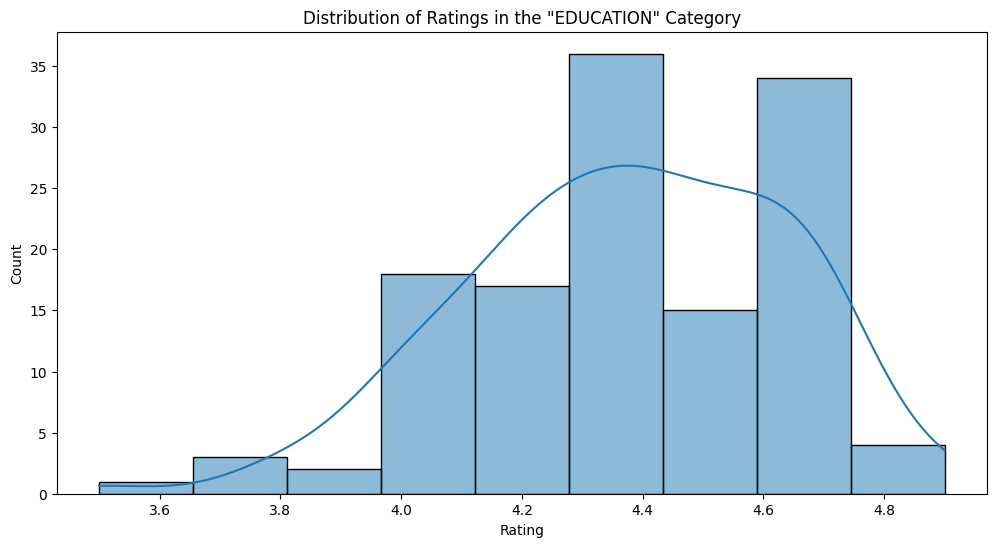

In [99]:
#  plot insight 14 for most common rating in the "EDUCATION" category
plt.figure(figsize=(12, 6))
sns.histplot(data=education_category, x='Rating', kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in the "EDUCATION" Category')
plt.show()

In [100]:
# which app category has the highest installs?
highest_installs_category = df.groupby('Category')['Installs'].sum().idxmax()
print(f"The category with the highest installs is: {highest_installs_category}")

The category with the highest installs is: GAME


In [101]:
# and how many installs does it have?
highest_installs_value = df.groupby('Category')['Installs'].sum().max()
print(f"The category with the highest installs has {highest_installs_value} installs")

The category with the highest installs has 31544024415 installs


In [102]:
# print above number of installs in crore in power of 10
highest_installs_value_crore = highest_installs_value / 10**7
print(f"The category with the highest installs has {highest_installs_value_crore:.2f} crore installs")


The category with the highest installs has 3154.40 crore installs


In [103]:
# which category app has the lowest nunber of installs?
lowest_installs_category = df.groupby('Category')['Installs'].sum().idxmin()
print(f"The category with the lowest installs is: {lowest_installs_category}")

The category with the lowest installs is: EVENTS


In [104]:
# number of installs in the Education category ?
education_installs = df[df['Category'] == 'EDUCATION']['Installs'].sum()
print(f"The number of installs in the 'EDUCATION' category is: {education_installs}")

The number of installs in the 'EDUCATION' category is: 533952000


In [105]:
## print above number of installs in crore in power of 10
education_installs_crore = education_installs / 10**7
print(f"The number of installs in the 'EDUCATION' category is: {education_installs_crore:.2f} crore")

The number of installs in the 'EDUCATION' category is: 53.40 crore


In [106]:
# extract some insights using groupby and agg functions
# insight 15: The average rating for each category but top 10 categories and using agg function
top_categories = df['Category'].value_counts().head(10).index
category_ratings = df[df['Category'].isin(top_categories)].groupby('Category')['Rating'].agg(['mean', 'count'])
print(category_ratings) 

                     mean  count
Category                        
BUSINESS         4.198216    427
COMMUNICATION    4.174322    366
FAMILY           4.202149   1939
FINANCE          4.150729    360
GAME             4.282733   1121
LIFESTYLE        4.139115    373
MEDICAL          4.225910    408
PERSONALIZATION  4.333624    386
PRODUCTIVITY     4.229206    407
TOOLS            4.081928    841


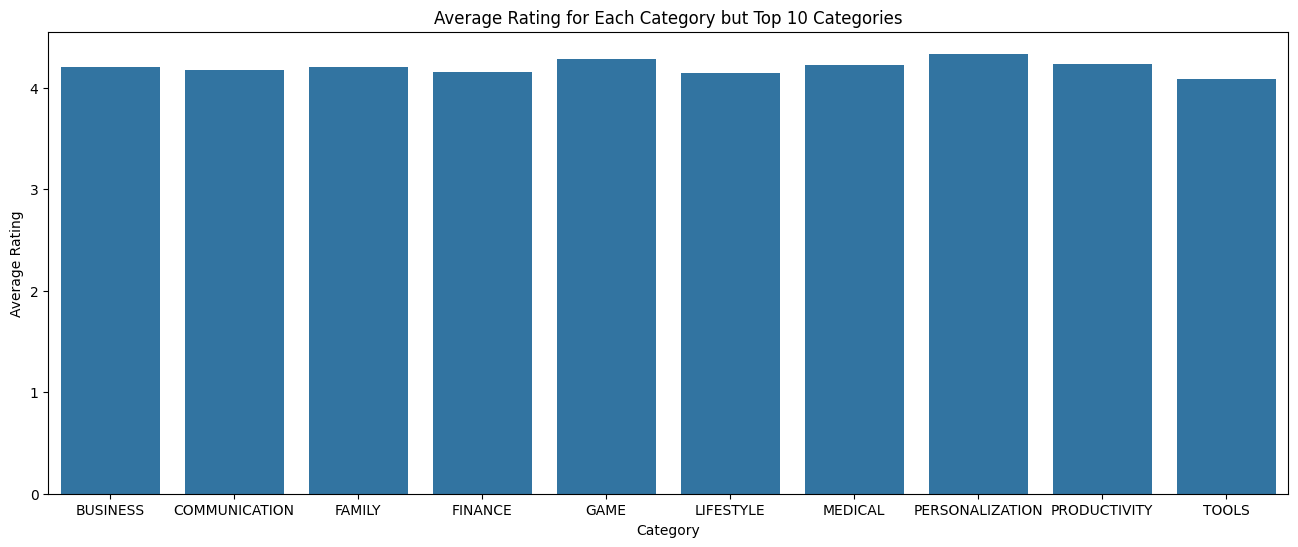

In [107]:
# plot insight 15 using bar plot
plt.figure(figsize=(16, 6)) 
sns.barplot(x=category_ratings.index, y=category_ratings['mean'])
plt.xlabel('Category')
plt.ylabel('Average Rating')    
plt.title('Average Rating for Each Category but Top 10 Categories') 
plt.show()